## Imports

In [1]:
#### using pandas 
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
from Question1_LinearReg import plot_graph_a, plot_graph_b, scalar_encoding, lin_regress
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import re
from math import *

## Question 1: Feature Encoding

In [2]:
def Dataset3_Question_1_a(ft_res, target):
    kf = KFold(n_splits=10, shuffle = True)
    train_rmse       = []
    test_rmse        = []
    i = 0
    for train_index, test_index in kf.split(ft_res[:,:]):
        # Seperate Data
        X_train = ft_res[:,:][train_index]
        X_test  = ft_res[:,:][test_index]
        y_train = target[train_index]
        y_test  = target[test_index ]

        # Perform Linear Regression
        reg = LinearRegression().fit(X_train, y_train)

        # RMSE
        y_pred_train = reg.predict(X_train)
        y_pred_test  = reg.predict(X_test )
        
        train_rmse.append((metrics.mean_squared_error(y_train, y_pred_train)))
        test_rmse.append((metrics.mean_squared_error(y_test, y_pred_test )))

        plt.figure(1)
        plt.scatter(y_test, y_pred_test , c = 'blue', marker = 'x')
        plt.xlabel("True Values")
        plt.ylabel("Predictions")
        plt.title("Correlation of Predictor: Linear Regressor")
        if i == 9:
            plt.savefig('correlation_prediction_lin_reg.png', bbox_inches='tight')
            plt.show()
        i += 1
    plt.show()
    train_rmse = np.array(train_rmse)
    test_rmse  = np.array(test_rmse )
    mean_train_rmse = np.mean(train_rmse)
    mean_test_rmse  = np.mean(test_rmse )
    print(np.sqrt(mean_train_rmse))
    print(np.sqrt(mean_test_rmse ))

In [3]:
def Dataset3_Question_1_b(ft_res, target):
    kf = KFold(n_splits=10, shuffle = True)
    train_rmse       = []
    test_rmse        = []
    i = 0
    for train_index, test_index in kf.split(ft_res[:,:]):
        # Seperate Data
        X_train = ft_res[:,:][train_index]
        X_test  = ft_res[:,:][test_index]
        y_train = target[train_index]
        y_test  = target[test_index ]

        # Perform Linear Regression
        reg = LinearRegression().fit(X_train, y_train)

        # RMSE
        y_pred_train = reg.predict(X_train)
        y_pred_test  = reg.predict(X_test )
        
        train_rmse.append((metrics.mean_squared_error(y_train, y_pred_train)))
        test_rmse.append((metrics.mean_squared_error(y_test, y_pred_test )))

        plt.figure(2)
        plt.scatter(y_pred_test, y_test - y_pred_test, c = 'blue', marker = 'x')
        plt.xlabel("Predictions")
        plt.ylabel("Residuals")
        plt.title("Error of Predictor: Linear Regressor")
        if i == 9:
            plt.savefig('error_prediction_lin_reg.png', bbox_inches='tight')
            plt.show()
        i += 1

    plt.show()
    train_rmse = np.array(train_rmse)
    test_rmse  = np.array(test_rmse )
    mean_train_rmse = np.mean(train_rmse)
    mean_test_rmse  = np.mean(test_rmse )
    print(np.sqrt(mean_train_rmse))
    print(np.sqrt(mean_test_rmse ))

## Load data

In [4]:
path = './'
df = pd.read_csv(path+'insurance_data.csv')
ft0 = ['ft1','ft2','ft3','ft4', 'ft5', 'ft6']
numerical_features  = ['ft1', 'ft2', 'ft3']
encoded_features    = ['ft4', 'ft5', 'ft6']

## Target Feature

In [5]:
target = df['charges']

In [6]:
#part a, don't use standard scaler, part b, use standard scaler

Part c: Divide ft1 into 3 ranges: < 30, [30,50] and > 50. That is, set the new values to
1 for original values below 30, 2 for values between 30 and 50 and 3 for values
above 50. Standardize ft2 and ft3 feature. One-hot encoding the rest three
categorical features

## Preprocess features

In [7]:
preprocess_a = make_column_transformer(
    (OneHotEncoder(sparse=False), encoded_features),
    remainder='passthrough'
)

In [8]:
preprocess_b = make_column_transformer(
    (StandardScaler(),numerical_features),
    (OneHotEncoder(sparse=False), encoded_features),
    remainder='passthrough'
)

In [9]:
preprocess_c = make_column_transformer(
    (StandardScaler(),numerical_features[1:3]),
    (OneHotEncoder(sparse=False), encoded_features),
    remainder='passthrough'
)

## Fit Transform Features

In [10]:
ft_res_a = preprocess_a.fit_transform(df[ft0])
ft_res_b = preprocess_b.fit_transform(df[ft0])
ft_res_c = preprocess_c.fit_transform(df[ft0])


## For part c, split into ranges

In [11]:
for i in range(ft_res_c[:,0].shape[0]):
    if ft_res_c[:,0][i] < 30:
        ft_res_c[:,0][i] = 1
    elif ft_res_c[:,0][i] > 30 and ft_res_c[:,0][i] < 50:
        ft_res_c[:,0][i] = 2
    else:
        ft_res_c[:,0][i] = 3

## Get RMSE and Plot

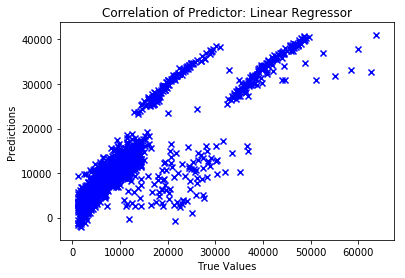

6039.2576178720665
6088.986611188599


In [12]:
Dataset3_Question_1_a(ft_res_a, target)

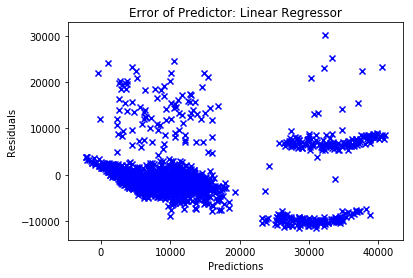

6039.375920763966
6086.169416035131


In [13]:
Dataset3_Question_1_b(ft_res_a, target)

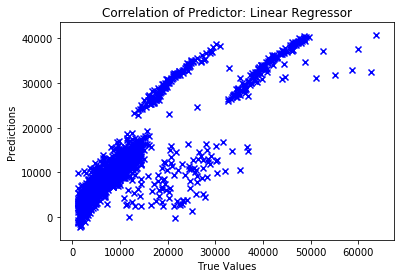

6039.508789292015
6084.248592192808


In [14]:
Dataset3_Question_1_a(ft_res_b, target)

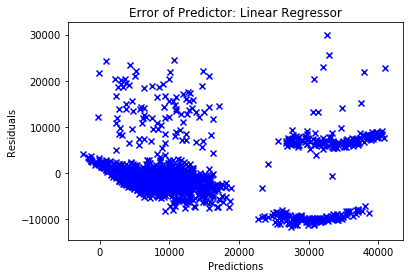

6039.53053598626
6082.551208945546


In [15]:
Dataset3_Question_1_b(ft_res_b, target)

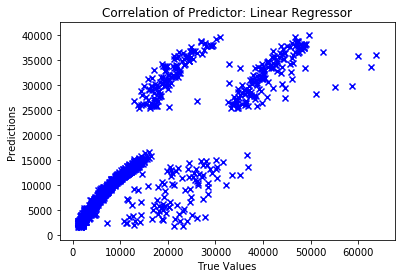

6350.599132162371
6406.207222157875


In [16]:
Dataset3_Question_1_a(ft_res_c, target)

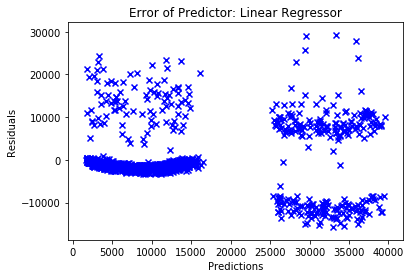

6350.395693434577
6410.5744948386


In [17]:
Dataset3_Question_1_b(ft_res_c, target)

# Question 2: Correlation Exploration

Convert each categorical feature into a one dimensional numerical value. Now
we have 6 numerical features. Use f regression and mutual information regression measure to select two most important variables respectively. Report
the two most important variables you find

In [18]:
preprocess_1 = make_column_transformer(
    (StandardScaler(),numerical_features),
    (OrdinalEncoder(), encoded_features),
    remainder='passthrough'
)

ft_res_1 = preprocess_1.fit_transform(df[ft0])

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(ft_res_1, target, test_size=0.1)

(F_1_train,pvalues_1_train) = f_regression(X_train_1,y_train_1)
mir_train = mutual_info_regression(X_train_1,y_train_1)

(F_1_test,pvalues_1_test) = f_regression(X_test_1,y_test_1)
mir_test = mutual_info_regression(X_test_1,y_test_1)

print("Train Outputs: ")
print("F1: ", F_1_train)
print("pvalues: ", pvalues_1_train)
print("Mutual Information: ", mir_train)
print("\nTest Outputs: ")
print("F1: ", F_1_test)
print("pvalues: ", pvalues_1_test)
print("Mutual Information: ", mir_test)

Train Outputs: 
F1:  [1.26188733e+02 5.34479319e+01 2.61417777e+00 2.92628652e+00
 1.89860626e+03 6.16425824e-02]
pvalues:  [6.50274455e-028 4.83203001e-013 1.06174800e-001 8.74057663e-002
 1.35313819e-249 8.03960767e-001]
Mutual Information:  [1.45663665 0.08999002 0.14997992 0.14713432 0.37555178 0.08062973]

Test Outputs: 
F1:  [  6.48855508   2.08406466   9.73059747   2.33967538 304.37605561
   2.21160749]
pvalues:  [1.20040583e-02 1.51212512e-01 2.22576466e-03 1.28508759e-01
 4.41286351e-36 1.39360705e-01]
Mutual Information:  [1.17943275e+00 1.57825934e-02 2.70219543e-01 1.28858238e-02
 3.96010368e-01 8.10403730e-04]


### From above, two most important variables are feature 1 and feature 5

### Charges vs Feature 2

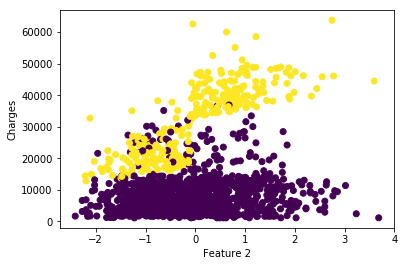

In [19]:
plt.scatter(ft_res_1[:,1], target, c=ft_res_1[:,4])
plt.xlabel("Feature 2")
plt.ylabel("Charges")
plt.savefig("charges_vs_feature_2", bbox_inches='tight')

### Charges vs Feature 1

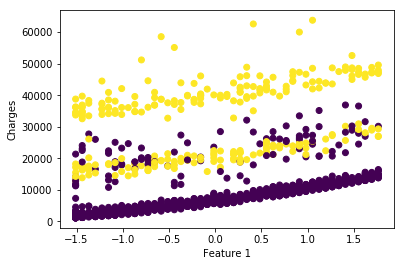

In [20]:
plt.scatter(ft_res_1[:,0], target, c=ft_res_1[:,4])
plt.xlabel("Feature 1")
plt.ylabel("Charges")
plt.savefig("charges_vs_feature_1", bbox_inches='tight')

## Question 3: Modify the target variable

In [21]:
target_log = np.log(df['charges'])

In [22]:
preprocess_q3 = make_column_transformer(
    (StandardScaler(),numerical_features),
    (OrdinalEncoder(), encoded_features),
    remainder='passthrough'
)

ft_res_q3 = preprocess_q3.fit_transform(df[ft0])

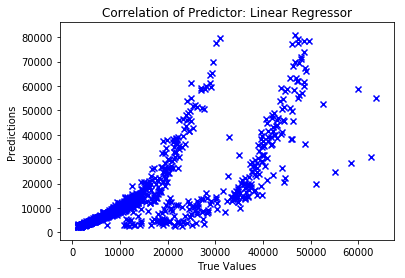

RMSE Train:  8370.518623054737
RMSE Test :  8430.776859585161


In [23]:
kf = KFold(n_splits=10, shuffle = True)
train_rmse       = []
test_rmse        = []
i = 0
for train_index, test_index in kf.split(ft_res_q3[:,:]):
    # Seperate Data
    X_train = ft_res_q3[:,:][train_index]
    X_test  = ft_res_q3[:,:][test_index]
    y_train_log = target_log[train_index]
    y_test_log  = target_log[test_index ]
    y_train = target[train_index]
    y_test  = target[test_index ]

    # Perform Linear Regression
    reg = LinearRegression().fit(X_train, y_train_log)

    # RMSE
    y_pred_train_log = reg.predict(X_train)
    y_pred_test_log  = reg.predict(X_test )

    train_rmse.append((metrics.mean_squared_error(y_train, np.exp(y_pred_train_log))))
    test_rmse.append((metrics.mean_squared_error(y_test, np.exp(y_pred_test_log))))

    plt.figure(1)
    plt.scatter(y_test, np.exp(y_pred_test_log) , c = 'blue', marker = 'x')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Correlation of Predictor: Linear Regressor")
    if i == 9:    
        plt.savefig("correlation_lin_regress_q3", bbox_inches='tight')
        plt.show()
    
    i += 1

plt.show()
train_rmse = np.array(train_rmse)
test_rmse  = np.array(test_rmse )
mean_train_rmse = np.mean(train_rmse)
mean_test_rmse  = np.mean(test_rmse )
print("RMSE Train: ", np.sqrt(mean_train_rmse))
print("RMSE Test : ", np.sqrt(mean_test_rmse ))

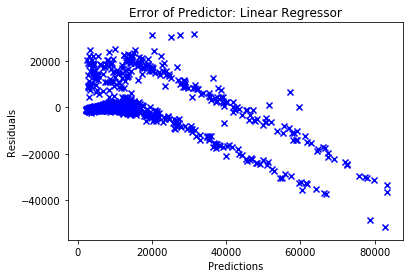

RMSE Train:  8368.396519855547
RMSE Test :  8457.33300160213


In [24]:
kf = KFold(n_splits=10, shuffle = True)
train_rmse       = []
test_rmse        = []
i = 0
for train_index, test_index in kf.split(ft_res_q3[:,:]):
    # Seperate Data
    X_train = ft_res_q3[:,:][train_index]
    X_test  = ft_res_q3[:,:][test_index]
    y_train_log = target_log[train_index]
    y_test_log  = target_log[test_index ]
    y_train = target[train_index]
    y_test  = target[test_index ]

    # Perform Linear Regression
    reg = LinearRegression().fit(X_train, y_train_log)

    # RMSE
    y_pred_train_log = reg.predict(X_train)
    y_pred_test_log  = reg.predict(X_test )

    train_rmse.append((metrics.mean_squared_error(y_train, np.exp(y_pred_train_log))))
    test_rmse.append((metrics.mean_squared_error(y_test, np.exp(y_pred_test_log))))

    plt.figure(2)
    plt.scatter(np.exp(y_pred_test_log), y_test - np.exp(y_pred_test_log), c = 'blue', marker = 'x')
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.title("Error of Predictor: Linear Regressor")
    if i == 9:
        plt.savefig("error_of_pred_lin_regress_q3", bbox_inches='tight')
        plt.show()
    
    i += 1

plt.show()
train_rmse = np.array(train_rmse)
test_rmse  = np.array(test_rmse )
mean_train_rmse = np.mean(train_rmse)
mean_test_rmse  = np.mean(test_rmse )
print("RMSE Train: ", np.sqrt(mean_train_rmse))
print("RMSE Test : ", np.sqrt(mean_test_rmse ))

## From above, we see performance gets worse

In [25]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(ft_res_q3, target_log, test_size=0.1)

(F_1_train,pvalues_1_train) = f_regression(X_train_1,y_train_1)
mir_train = mutual_info_regression(X_train_1,y_train_1)

(F_1_test,pvalues_1_test) = f_regression(X_test_1,y_test_1)
mir_test = mutual_info_regression(X_test_1,y_test_1)

print("Train Outputs: ")
print("F1: ", F_1_train)
print("pvalues: ", pvalues_1_train)
print("Mutual Information: ", mir_train)
print("\nTest Outputs: ")
print("F1: ", F_1_test)
print("pvalues: ", pvalues_1_test)
print("Mutual Information: ", mir_test)

Train Outputs: 
F1:  [4.64474683e+02 2.68780136e+01 3.32864124e+01 2.67175224e-01
 9.81566162e+02 1.43805312e+00]
pvalues:  [2.29055905e-087 2.54044905e-007 1.01087249e-008 6.05328071e-001
 5.23221608e-158 2.30690988e-001]
Mutual Information:  [1.42777592 0.08097315 0.16303225 0.16557719 0.37610917 0.06741632]

Test Outputs: 
F1:  [5.06903362e+01 2.08281410e-03 2.39558089e+00 7.97700099e-01
 8.28902101e+01 1.94231005e+00]
pvalues:  [6.24895270e-11 9.63667865e-01 1.24072765e-01 3.73407315e-01
 1.18645328e-15 1.65759923e-01]
Mutual Information:  [1.15955301 0.02163408 0.05054302 0.01764923 0.37337191 0.03920494]


## Still, Features 1 and 5 are the most important features

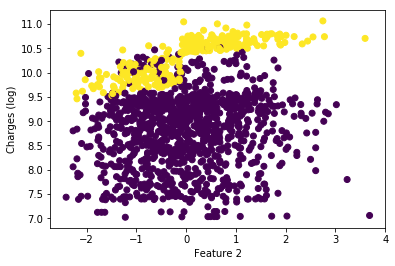

In [26]:
plt.scatter(ft_res_1[:,1], target_log, c=ft_res_1[:,4])
plt.xlabel("Feature 2")
plt.ylabel("Charges (log)")
plt.savefig("q3_charges_log_vs_feature2", bbox_inches='tight')

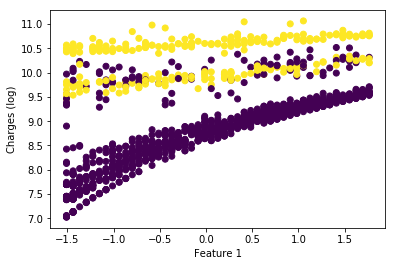

In [27]:
plt.scatter(ft_res_1[:,0], target_log, c=ft_res_1[:,4])
plt.xlabel("Feature 1")
plt.ylabel("Charges (log)")
plt.savefig("q3_charges_log_vs_feature1", bbox_inches='tight')

In [28]:
###############################   Bonus questions #####################################

In [29]:
def Dataset3_Question_1_bonus_a(ft_res, alpha, target):
    kf = KFold(n_splits=10, shuffle = True)
    train_rmse       = []
    test_rmse        = []
    i = 0
    for train_index, test_index in kf.split(ft_res[:,:]):
        # Seperate Data
        X_train = ft_res[:,:][train_index]
        X_test  = ft_res[:,:][test_index]
        y_train = target[train_index]
        y_test  = target[test_index ]

        # Perform Linear Regression
        reg = Ridge(alpha=alpha).fit(X_train, y_train)

        # RMSE
        y_pred_train = reg.predict(X_train)
        y_pred_test  = reg.predict(X_test )
        
        train_rmse.append((metrics.mean_squared_error(y_train, y_pred_train)))
        test_rmse.append((metrics.mean_squared_error(y_test, y_pred_test )))

#         plt.figure(1)
#         plt.scatter(y_test, y_pred_test , c = 'blue', marker = 'x')
#         plt.xlabel("True Values")
#         plt.ylabel("Predictions")
#         plt.title("Correlation of Predictor: Linear Regressor")
#         if i == 9:
#             plt.savefig('correlation_prediction_lin_reg.png', bbox_inches='tight')
#             plt.show()
#         i += 1
#     #plt.show()
    train_rmse = np.array(train_rmse)
    test_rmse  = np.array(test_rmse )
    mean_train_rmse = np.mean(train_rmse)
    mean_test_rmse  = np.mean(test_rmse )
    print(np.sqrt(mean_train_rmse))
    print(np.sqrt(mean_test_rmse ))
    return np.sqrt(mean_test_rmse )

In [30]:
def Dataset3_Question_1_bonus_b(ft_res,alpha, target):
    kf = KFold(n_splits=10, shuffle = True)
    train_rmse       = []
    test_rmse        = []
    i = 0
    for train_index, test_index in kf.split(ft_res[:,:]):
        # Seperate Data
        X_train = ft_res[:,:][train_index]
        X_test  = ft_res[:,:][test_index]
        y_train = target[train_index]
        y_test  = target[test_index ]

        # Perform Linear Regression
        reg = reg = Ridge(alpha=alpha).fit(X_train, y_train)

        # RMSE
        y_pred_train = reg.predict(X_train)
        y_pred_test  = reg.predict(X_test )
        
        train_rmse.append((metrics.mean_squared_error(y_train, y_pred_train)))
        test_rmse.append((metrics.mean_squared_error(y_test, y_pred_test )))

#         plt.figure(2)
#         plt.scatter(y_pred_test, y_test - y_pred_test, c = 'blue', marker = 'x')
#         plt.xlabel("Predictions")
#         plt.ylabel("Residuals")
#         plt.title("Error of Predictor: Linear Regressor")
#         if i == 9:
#             plt.savefig('error_prediction_lin_reg.png', bbox_inches='tight')
#             plt.show()
#         i += 1

    #plt.show()
    train_rmse = np.array(train_rmse)
    test_rmse  = np.array(test_rmse )
    mean_train_rmse = np.mean(train_rmse)
    mean_test_rmse  = np.mean(test_rmse )
    print(np.sqrt(mean_train_rmse))
    print(np.sqrt(mean_test_rmse ))
    return np.sqrt(mean_test_rmse )

In [31]:
 c = np.logspace(-5,5,40)
kmin_1 = 1e9
kmin_2 = 1e9
best_c_1 = 0
best_c_2 = 0
kstore1 = []
kstore2 = []

    
for alpha in c:
    print(alpha)
    print()
    print('a')
    k1 = Dataset3_Question_1_bonus_a(ft_res_a, alpha, target)
    kstore1.append(k1)
    Dataset3_Question_1_bonus_b(ft_res_a, alpha, target)
    print('b')
    k2 = Dataset3_Question_1_bonus_a(ft_res_b, alpha, target)
    kstore2.append(k2)
    Dataset3_Question_1_bonus_b(ft_res_b, alpha, target)
    if k1 <kmin_1:
        kmin_1 = k1
        best_c_1 = alpha
    if k2 <kmin_2:
        kmin_2 = k2
        best_c_2 = alpha

    print()
    
    

1e-05

a
6039.255661128392
6087.464305278022
6039.224375871066
6088.907536997664
b
6038.897643233098
6094.191547157153
6038.868333827053
6094.688130025085

1.80472176682717e-05

a
6039.380092903545
6085.275873921195
6039.259967386742
6088.7183815913295
b
6039.85948578997
6075.612773855548
6037.880702730072
6112.233083890529

3.257020655659783e-05

a
6038.354184601444
6105.270030504109
6038.975112691231
6091.872640544631
b
6039.401602119049
6083.764316852792
6039.014315944949
6092.605675916008

5.878016072274912e-05

a
6038.808845728641
6096.340366957932
6039.338585785845
6086.208891711136
b
6039.579524379479
6081.557438211354
6038.844988427084
6096.142781540186

0.00010608183551394483

a
6039.31275426328
6086.613687915739
6039.190159756792
6088.336070936014
b
6039.131847434643
6091.59454006965
6039.555994656812
6081.368552666771

0.00019144819761699575

a
6039.1222065463035
6089.732951917073
6038.695011579339
6097.200115229566
b
6039.373609855276
6085.863763129289
6039.166918892102
608

6078.61051969662   0.021544346900318822
-----------------------------------
6040.12861960133
6070.878358972572
-----------------------------------
6073.372906576908   0.07017038286703822
-----------------------------------
6039.335744773514
6086.021585967632
-----------------------------------


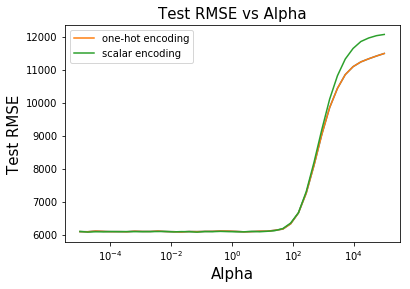

In [32]:
print(kmin_1,' ',best_c_1)
print('-'*35)
Dataset3_Question_1_bonus_a(ft_res_a, best_c_1, target)
print('-'*35)
print(kmin_2,' ',best_c_2)
print('-'*35)
Dataset3_Question_1_bonus_b(ft_res_b, best_c_2, target)
print('-'*35)
plt.plot(c,kstore1)
plt.xscale('log')

plt.plot(c,kstore1, label = 'one-hot encoding')
plt.plot(c,kstore2,label = 'scalar encoding')
plt.xscale('log')

plt.xlabel('Alpha', size=15)
plt.ylabel('Test RMSE', size=15)
plt.title('Test RMSE vs Alpha', size=15)
plt.legend(fontsize=10)
plt.draw()
plt.savefig('d3ridge.png', bbox_inches='tight')
plt.show()

In [33]:
def Dataset3_Question_1_bonus_a_l(ft_res, alpha, target):
    kf = KFold(n_splits=10, shuffle = True)
    train_rmse       = []
    test_rmse        = []
    i = 0
    for train_index, test_index in kf.split(ft_res[:,:]):
        # Seperate Data
        X_train = ft_res[:,:][train_index]
        X_test  = ft_res[:,:][test_index]
        y_train = target[train_index]
        y_test  = target[test_index ]

        # Perform Linear Regression
        reg = Lasso(alpha=alpha).fit(X_train, y_train)

        # RMSE
        y_pred_train = reg.predict(X_train)
        y_pred_test  = reg.predict(X_test )
        
        train_rmse.append((metrics.mean_squared_error(y_train, y_pred_train)))
        test_rmse.append((metrics.mean_squared_error(y_test, y_pred_test )))

#         plt.figure(1)
#         plt.scatter(y_test, y_pred_test , c = 'blue', marker = 'x')
#         plt.xlabel("True Values")
#         plt.ylabel("Predictions")
#         plt.title("Correlation of Predictor: Linear Regressor")
#         if i == 9:
#             plt.savefig('correlation_prediction_lin_reg.png', bbox_inches='tight')
#             plt.show()
#         i += 1
    #plt.show()
    train_rmse = np.array(train_rmse)
    test_rmse  = np.array(test_rmse )
    mean_train_rmse = np.mean(train_rmse)
    mean_test_rmse  = np.mean(test_rmse )
    print(np.sqrt(mean_train_rmse))
    print(np.sqrt(mean_test_rmse ))
    return np.sqrt(mean_test_rmse )

In [34]:
def Dataset3_Question_1_bonus_b_l(ft_res,alpha, target):
    kf = KFold(n_splits=10, shuffle = True)
    train_rmse       = []
    test_rmse        = []
    i = 0
    for train_index, test_index in kf.split(ft_res[:,:]):
        # Seperate Data
        X_train = ft_res[:,:][train_index]
        X_test  = ft_res[:,:][test_index]
        y_train = target[train_index]
        y_test  = target[test_index ]

        # Perform Linear Regression
        reg = Lasso(alpha=alpha).fit(X_train, y_train)

        # RMSE
        y_pred_train = reg.predict(X_train)
        y_pred_test  = reg.predict(X_test )
        
        train_rmse.append((metrics.mean_squared_error(y_train, y_pred_train)))
        test_rmse.append((metrics.mean_squared_error(y_test, y_pred_test )))

#         plt.figure(2)
#         plt.scatter(y_pred_test, y_test - y_pred_test, c = 'blue', marker = 'x')
#         plt.xlabel("Predictions")
#         plt.ylabel("Residuals")
#         plt.title("Error of Predictor: Linear Regressor")
#         if i == 9:
#             plt.savefig('error_prediction_lin_reg.png', bbox_inches='tight')
#             plt.show()
#         i += 1

    #plt.show()
    train_rmse = np.array(train_rmse)
    test_rmse  = np.array(test_rmse )
    mean_train_rmse = np.mean(train_rmse)
    mean_test_rmse  = np.mean(test_rmse )
    print(np.sqrt(mean_train_rmse))
    print(np.sqrt(mean_test_rmse ))
    return np.sqrt(mean_test_rmse )

In [35]:
 c = np.logspace(-5,5,40)
kmin_1 = 1e9
kmin_2 = 1e9
best_c_1 = 0
best_c_2 = 0
kstore1 = []
kstore2 = []

    
for alpha in c:
    print(alpha)
    print()
    print('a')
    k1 = Dataset3_Question_1_bonus_a_l(ft_res_a, alpha, target)
    kstore1.append(k1)
    Dataset3_Question_1_bonus_b_l(ft_res_a, alpha, target)
    print('b')
    k2 = Dataset3_Question_1_bonus_a_l(ft_res_b, alpha, target)
    kstore2.append(k2)
    Dataset3_Question_1_bonus_b_l(ft_res_b, alpha, target)
    if k1 <kmin_1:
        kmin_1 = k1
        best_c_1 = alpha
    if k2 <kmin_2:
        kmin_2 = k2
        best_c_2 = alpha

    print()
    

1e-05

a
6038.610556599587
6100.096377515465
6039.350924874458
6085.112697841003
b
6039.241831026012
6087.998697605923
6039.736915560775
6078.933615225977

1.80472176682717e-05

a
6039.123735808392
6089.652254561577
6039.384119400537
6085.213760215322
b
6039.252594972507
6087.334791841667
6039.17170329521
6089.901844067765

3.257020655659783e-05

a
6039.5622050355805
6081.597988961633
6039.47974770019
6082.780188955078
b
6038.937002877253
6094.107825257993
6039.170734009585
6088.3945633189505

5.878016072274912e-05

a
6039.342010545517
6086.580245108611
6039.195144255406
6088.012855921915
b
6039.302125687245
6087.04161963384
6039.622476084078
6080.4643235524545

0.00010608183551394483

a
6039.319660488882
6088.127269255274
6039.492855892011
6084.366442776751
b
6038.9082467664775
6094.0466584135875
6039.172641730192
6089.527287358978

0.00019144819761699575

a
6038.763564616313
6097.075075495398
6039.003037566846
6091.532512198252
b
6039.856528659505
6076.409044536315
6039.50690790217
6

6078.95670030417   0.021544346900318822
-----------------------------------
6038.717206198188
6096.631243496767
-----------------------------------
6073.19303195516   14.251026703029963
-----------------------------------
6048.474119523255
6108.399571416757
-----------------------------------


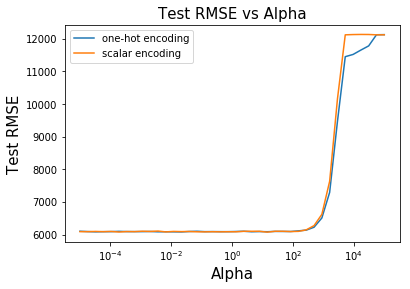

In [36]:
print(kmin_1,' ',best_c_1)
print('-'*35)
Dataset3_Question_1_bonus_a(ft_res_a, best_c_1, target)
print('-'*35)
print(kmin_2,' ',best_c_2)
print('-'*35)
Dataset3_Question_1_bonus_b(ft_res_b, best_c_2, target)
print('-'*35)



plt.plot(c,kstore1, label = 'one-hot encoding')
plt.plot(c,kstore2,label = 'scalar encoding')
plt.xscale('log')

plt.xlabel('Alpha', size=15)
plt.ylabel('Test RMSE', size=15)
plt.title('Test RMSE vs Alpha', size=15)
plt.legend(fontsize=10)
plt.draw()
plt.savefig('d3lasso.png', bbox_inches='tight')
plt.show()

In [53]:
def Dataset3_Question_1_bonus_log(ft_res,alpha, target):
    kf = KFold(n_splits=5, shuffle = True)
    train_rmse       = []
    test_rmse        = []
    i = 0
    for train_index, test_index in kf.split(ft_res[:,:]):
        # Seperate Data
        X_train = ft_res[:,:][train_index]
        X_test  = ft_res[:,:][test_index]
        y_train = target[train_index]
        y_test  = target[test_index ]

        # Perform Linear Regression
        reg = SVR(gamma='scale', C=alpha, epsilon=0.2).fit(X_train, y_train)

        # RMSE
        y_pred_train = reg.predict(X_train)
        y_pred_test  = reg.predict(X_test )
        
        train_rmse.append((metrics.mean_squared_error(y_train, y_pred_train)))
        test_rmse.append((metrics.mean_squared_error(y_test, y_pred_test )))

#         plt.figure(1)
#         plt.scatter(y_test, y_pred_test , c = 'blue', marker = 'x')
#         plt.xlabel("True Values")
#         plt.ylabel("Predictions")
#         plt.title("Correlation of Predictor: Linear Regressor")
#         if i == 9:
#             plt.savefig('correlation_prediction_lin_reg.png', bbox_inches='tight')
#             plt.show()
#         i += 1
    #plt.show()
    train_rmse = np.array(train_rmse)
    test_rmse  = np.array(test_rmse )
    mean_train_rmse = np.mean(train_rmse)
    mean_test_rmse  = np.mean(test_rmse )
    print(np.sqrt(mean_train_rmse))
    print(np.sqrt(mean_test_rmse ))
    return np.sqrt(mean_test_rmse )

In [54]:
 c = np.logspace(1,5,10)
kmin_1 = 1e9
best_c_1 = 0
best_c_2 = 0
kstore1 = []
kstore2 = []


    
for alpha in c:
    print(alpha)
    print()
    print('a')
    k1 = Dataset3_Question_1_bonus_log(ft_res_a, alpha, target)
    kstore1.append(k1)
    k2 = Dataset3_Question_1_bonus_log(ft_res_b, alpha, target)
    kstore2.append(k2)
    if k1 <kmin_1:
        kmin_1 = k1
        best_c_1 = alpha
    
    if k2 <kmin_2:
        kmin_2 = k2
        best_c_2 = alpha

    print()

10.0

a
12734.205804740028
12744.492595016962
12540.190557364629
12548.48321614867

27.825594022071243

a
12847.439018759793
12861.300139441528
12288.743360799932
12303.500309440029

77.4263682681127

a
12906.57488780763
12916.655939524619
11773.399225182418
11792.536965927937

215.44346900318823

a
12886.303978997315
12903.030747178878
9928.876380908861
9971.459086267681

599.4842503189409

a
12729.2979331547
12743.108369746464
7911.966647973179
7961.894277577108

1668.100537200059

a
12147.302237983284
12167.825994475868
5663.973977322874
5753.944344087821

4641.588833612777

a
10559.188633106367
10625.00334549368
4956.656974470794
5070.830281826524

12915.496650148827

a
8260.857750316929
8334.28521677723
4797.524082662649
4951.67553555282

35938.13663804626

a
5756.579450888907
5918.869218636915
4724.786693675447
4933.835226725921

100000.0

a
4944.81429877301
5042.260726105619
4658.328434762189
4894.635471609071



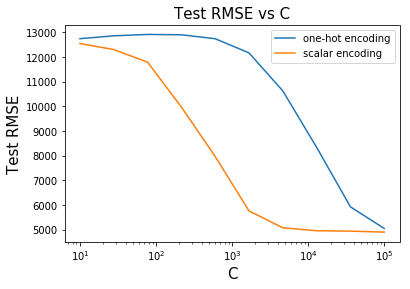

In [57]:

plt.plot(c,kstore1, label = 'one-hot encoding')
plt.plot(c,kstore2,label = 'scalar encoding')
plt.xscale('log')

plt.xlabel('C', size=15)
plt.ylabel('Test RMSE', size=15)
plt.title('Test RMSE vs C', size=15)
plt.legend(fontsize=10)
plt.draw()
plt.savefig('d3svr.png', bbox_inches='tight')
plt.show()